In [2]:
!pip install vitaldb

In [3]:
import vitaldb

In [4]:
features = ["ECG_II", "ART", "PHEN_VOL", "PHEN_RATE", "CI"]

caseids = vitaldb.find_cases(features)
caseids

[4871,
 6281,
 1803,
 6160,
 1936,
 1941,
 5142,
 5787,
 5534,
 3107,
 4388,
 6309,
 5670,
 293,
 936,
 4149,
 4024,
 5311,
 2765,
 4953,
 1004,
 1133,
 4333,
 1520,
 241,
 5626]

In [5]:
vals = vitaldb.load_case(caseids[0], features, interval=1)
# 1/100 is 0.01 sec interval = 100 Hz sampling rate

In [6]:
# to pandas dataframe
import pandas as pd

df = pd.DataFrame(vals)
df.isna().sum()

0     3988
1     3988
2     7154
3     7153
4    20706
dtype: int64

In [20]:
df

,ECG_II,ART,PHEN_VOL,PHEN_RATE,CI
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,-0.147344,152.145996,NaN,NaN,NaN
3,-0.226341,165.970001,NaN,NaN,NaN
4,0.435255,99.810600,NaN,NaN,NaN
...,...,...,...,...,...
31273,-0.058473,-54.232700,NaN,NaN,NaN
31274,-0.058473,-54.232700,NaN,NaN,NaN
31275,-0.058473,-54.232700,NaN,NaN,NaN
31276,-0.058473,-54.232700,NaN,NaN,NaN


In [8]:
df.columns = features

In [9]:
ecg = df["ECG_II"]
art = df["ART"]
phen_vol = df["PHEN_VOL"]
phen_rate = df["PHEN_RATE"]
ci = df["CI"]

<Axes: >

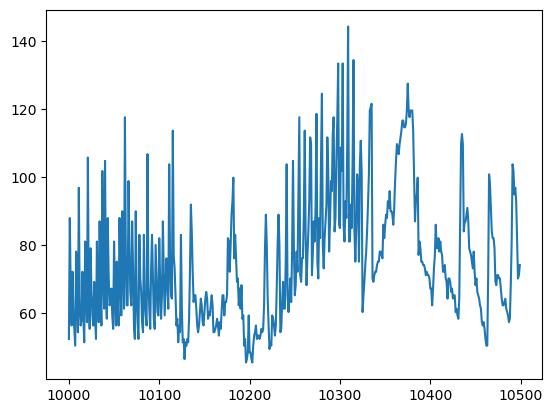

In [10]:
art[10000:10500].plot()  # arterial blood pressure

<Axes: >

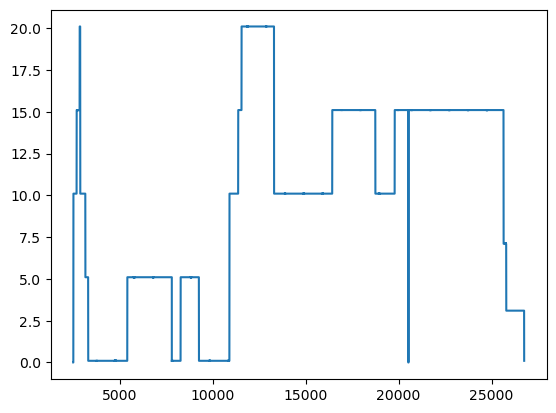

In [11]:
phen_rate.plot()

<Axes: >

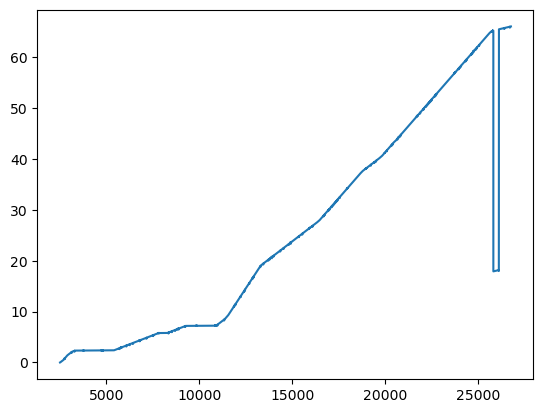

In [12]:
# phen vol is phenylephrine infusion volume
phen_vol.plot()

[[            nan             nan             nan             nan
              nan]
 [            nan             nan             nan             nan
              nan]
 [-1.47343993e-01  1.52145996e+02             nan             nan
              nan]
 ...
 [-5.84730990e-02 -5.42327003e+01             nan             nan
              nan]
 [-5.84730990e-02 -5.42327003e+01             nan             nan
              nan]
 [            nan             nan             nan             nan
              nan]]


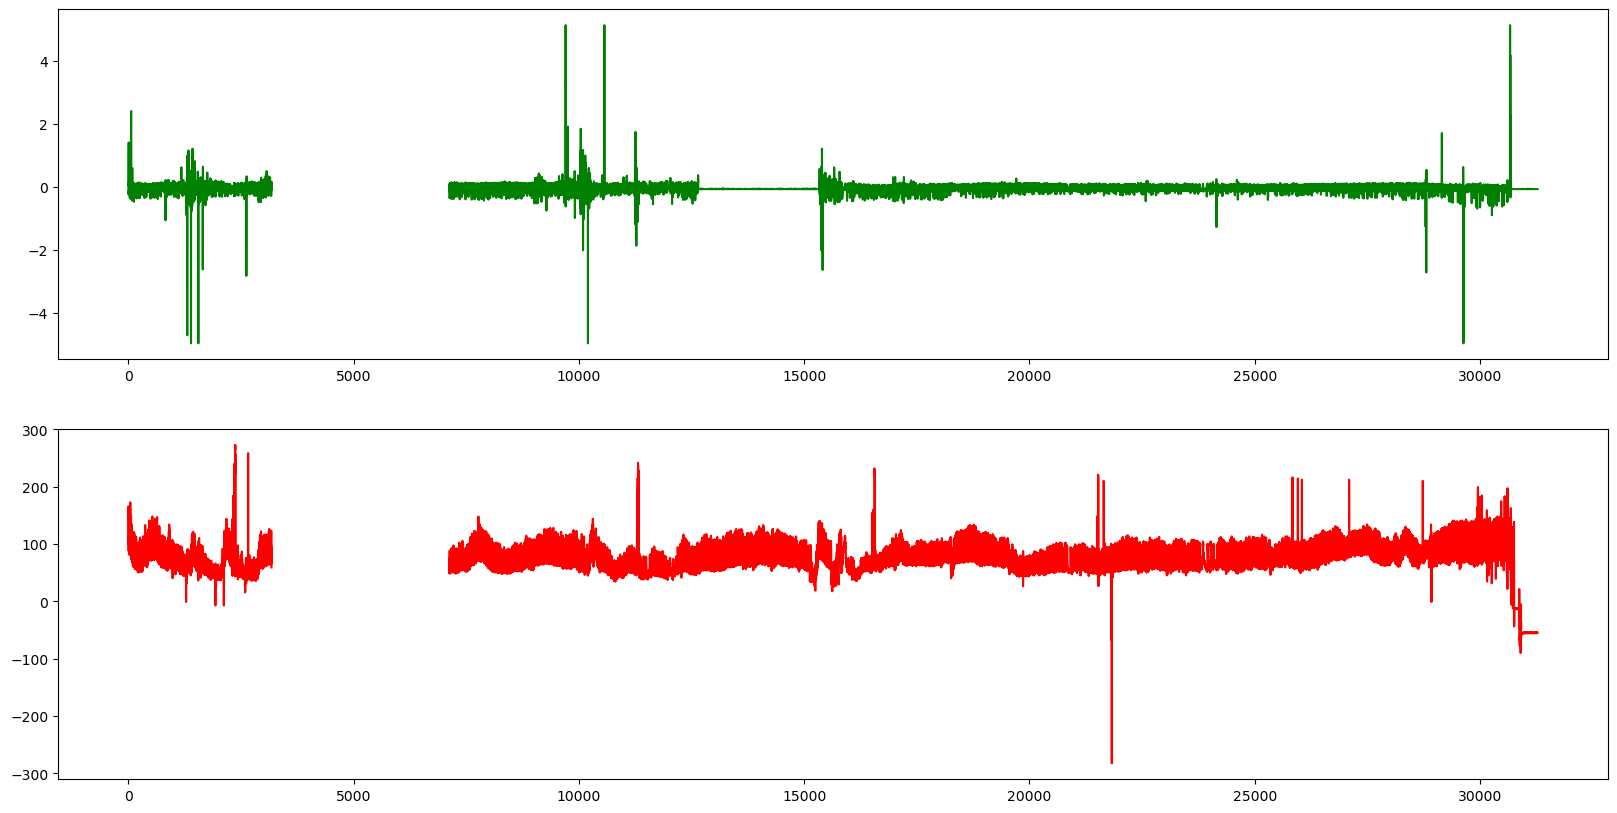

In [13]:
print(vals)

ecg = vals[:, 0]
art = vals[:, 1]


# plot

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

plt.subplot(211)

plt.plot(ecg[:], color="g")

plt.subplot(212)

plt.plot(art[:], color="r")

plt.show()

In [14]:
# get hours of data
print(len(ecg) / 3600 / 100)

0.08688333333333333


In [15]:
import pandas as pd
import requests
from io import StringIO

# URL for the clinical cases
url = "https://api.vitaldb.net/cases"

resp = requests.get(url)
resp.raise_for_status()

# The response is a gzipped CSV. VitalDB docs say it's CSV compressed with gzip
# But requests will give you the raw bytes; if it's compressed, decompress, or
# alternatively, use pandas read_csv with compression

# Decode the bytes into text
csv_text = resp.content.decode("utf-8-sig")  # strip BOM if present

# Read as plain CSV
cases_df = pd.read_csv(StringIO(csv_text))

# # Now you have a dataframe with e.g. columns:
# # 'caseid', 'age', 'sex', 'opname', plus many others

# # Example: show case 1
# print(cases_df.loc[cases_df['caseid'] == 1, ['age', 'sex', 'opname']])

In [16]:
cases_df.columns

Index(['caseid', 'subjectid', 'casestart', 'caseend', 'anestart', 'aneend',
       'opstart', 'opend', 'adm', 'dis', 'icu_days', 'death_inhosp', 'age',
       'sex', 'height', 'weight', 'bmi', 'asa', 'emop', 'department', 'optype',
       'dx', 'opname', 'approach', 'position', 'ane_type', 'preop_htn',
       'preop_dm', 'preop_ecg', 'preop_pft', 'preop_hb', 'preop_plt',
       'preop_pt', 'preop_aptt', 'preop_na', 'preop_k', 'preop_gluc',
       'preop_alb', 'preop_ast', 'preop_alt', 'preop_bun', 'preop_cr',
       'preop_ph', 'preop_hco3', 'preop_be', 'preop_pao2', 'preop_paco2',
       'preop_sao2', 'cormack', 'airway', 'tubesize', 'dltubesize', 'lmasize',
       'iv1', 'iv2', 'aline1', 'aline2', 'cline1', 'cline2', 'intraop_ebl',
       'intraop_uo', 'intraop_rbc', 'intraop_ffp', 'intraop_crystalloid',
       'intraop_colloid', 'intraop_ppf', 'intraop_mdz', 'intraop_ftn',
       'intraop_rocu', 'intraop_vecu', 'intraop_eph', 'intraop_phe',
       'intraop_epi', 'intraop_ca'],
     

In [17]:
cases_df[cases_df["caseid"] == 513]

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
512,513,6044,0,12322,174,13314.0,4314,12063,-220680,988920,...,0,0,0.0,0,110,0,5,200,0,0


In [18]:
cases_df["opname"].value_counts()

opname
Cholecystectomy                     503
Distal gastrectomy                  342
Lung lobectomy                      332
Breast-conserving surgery           295
Anterior resection                  247
                                   ... 
Ovarian cancer staging operation      1
Modified radical hysterectomy         1
Diverticulectomy                      1
Removal of complicated graft          1
Thyroidectomy                         1
Name: count, Length: 241, dtype: int64

In [19]:
cases_df.shape

(6388, 74)

VitalDB Notes
- The time interval is 0.01 seconds
- We have three datasets: 
    - clinical information (cross sectional)
    - hemodynamic parameters (time series)
    - pre-op lab results (cross sectional)
- The most popular surgery types are for cancer

PulseDB
- derived from VitalDB
- https://www.kaggle.com/code/mineshjethva/eda-pulsedb


Drug List
- amiodarone
- dexmedetomidine
- dobutamine
- dopamine
- dilitiazem
- epinephrine
- futhan
- milrinone
- norepinephrine
- nitroprusside
- nitroglycerin
- oxytocin
- prostaglandin
- phenylephrine
- propofol
- remifentanil
- rocuronium
- vasopressin
- vecuronium

Control
- Vasopressors: norepinephrine, phenylephrine, vasopressin, epinephrine

Outcome
- ABP
X
- ABP
- PLETH
- CO2
- ECG

Papers
1. https://ieeexplore.ieee.org/abstract/document/10821970
- transformer based classifier for intraoperative hypotension (binary outcome)
2. https://www.mdpi.com/1424-8220/23/22/9057
- measures cardiac output (regression)
- uses only two time series as features (PPG and ART)
3. https://iris.uniroma1.it/handle/11573/1714175
- remote patient monitoring system

Notes
- a lot of papers in the medical field are binary outcomes
- the cancer papers relied on genetics knowledge and were primarily cell based. Drug response is the response of a drug on a cell line

             <!-- PAST HISTORY
   +--------------------------------+
   | ABP  | HR  | SpO2 | EtCO2 | u  |
   +--------------------------------+
           (T_enc timesteps)
                    |
                    v
                 ENCODER
          (summarizes patient state)
                    |
               hidden state
                    |
          ------------------------
          |                      |
          v                      v
     DECODER INPUT           DECODER INPUT
  (prev ABP + zeros u)     (prev ABP + planned u)
          |                      |
          v                      v
     DECODER STEP 1          DECODER STEP 1
          |                      |
          v                      v
     Pred ABP t+1            Pred ABP t+1
          |                      |
          v                      v
     DECODER STEP 2          DECODER STEP 2
          |                      |
          v                      v
      ...                     ...
          |                      |
          v                      v
     Pred ABP t+H            Pred ABP t+H
          |                      |
          +----------------------+
          |
     Compare trajectories:
      - With zeros → ABP without intervention
      - With planned u → ABP under intervention -->


Use Case
- for doctors and nurses in either recovery or urgent care, not for surgery
- for remote patient monitoring and as a stop gap in case no one is available then the system will first alert then kick in to administer drugs (last resort system for overloaded hospitals)
- good for rural hospitals with limited staff and resources

In [ ]:
import numpy as np

E = np.array([[1, 0, -1], [-3 / 2, 0, 2], [1 / 2, 1, 0]])

np.linalg.inv(E) @ np.array([0, 0, 1])

array([0., 1., 0.])